Energiapiacok elemzési módszertana I.

Török János

2020-11-23

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from IPython.display import Latex, display, Markdown
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Feladat
(1. feladat)

In [2]:
# adatok beolvasása
energiaTábla = pd.read_excel('hf_energia.xlsx',sheet_name='Leiro',usecols='A:C')

# beolvasott adatok megjelenítése
energiaMérleg_összesitve = energiaTábla.pivot_table(values='Mennyiség', 
                                 index=['Forrás'],
                                 columns=['Felhasználás'], 
                                 aggfunc=np.sum,
                                 margins=True,
                                 margins_name='Összesen').fillna('')
display(energiaMérleg_összesitve)

Felhasználás,Főzés,Fűtés,Hűtés,Készülékek,Melegvíz,Összesen
Forrás,,,,,,
Földgáz,8110,103919.0,,,12391,124420
Kőolajtermékek,2293,400.0,,,445,3138
Megújulók,,67054.0,,,1386,68440
Szén,,5930.0,,,,5930
Távhő,,15990.0,,,4888,20878
Villamos energia,1477,1515.0,313,24809,12381,40495
Összesen,11880,194808.0,313,24809,31491,263301


## Milyen az energiafogyasztás szerkezete felhasználási módok és források szerint?

In [3]:
energiaMérleg = energiaTábla.pivot_table(values='Mennyiség', 
                                 index=['Forrás'],
                                 columns=['Felhasználás'], 
                                 aggfunc='sum').fillna(0)

In [4]:
display(energiaMérleg)

Felhasználás,Főzés,Fűtés,Hűtés,Készülékek,Melegvíz
Forrás,,,,,
Földgáz,8110.0,103919.0,0.0,0.0,12391.0
Kőolajtermékek,2293.0,400.0,0.0,0.0,445.0
Megújulók,0.0,67054.0,0.0,0.0,1386.0
Szén,0.0,5930.0,0.0,0.0,0.0
Távhő,0.0,15990.0,0.0,0.0,4888.0
Villamos energia,1477.0,1515.0,313.0,24809.0,12381.0


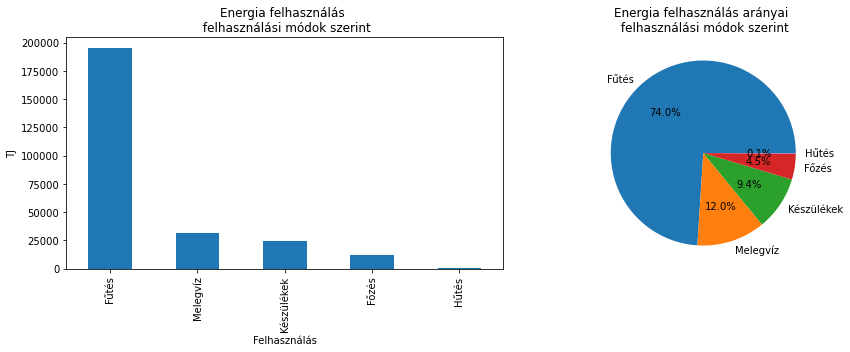

In [5]:
összesen_mod = energiaMérleg.sum().sort_values(ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
összesen_mod.plot(  
    kind = 'bar', 
    stacked = False, 
    title = 'Energia felhasználás \n felhasználási módok szerint', 
    mark_right = True,
    ylabel='TJ',
    ax = axs[0])

összesen_mod.plot(  
    kind = 'pie', 
    title = 'Energia felhasználás arányai \n felhasználási módok szerint', 
    ylabel='',
    table=False,
    autopct='%1.1f%%',
    ax = axs[1])
plt.tight_layout()
plt.show()

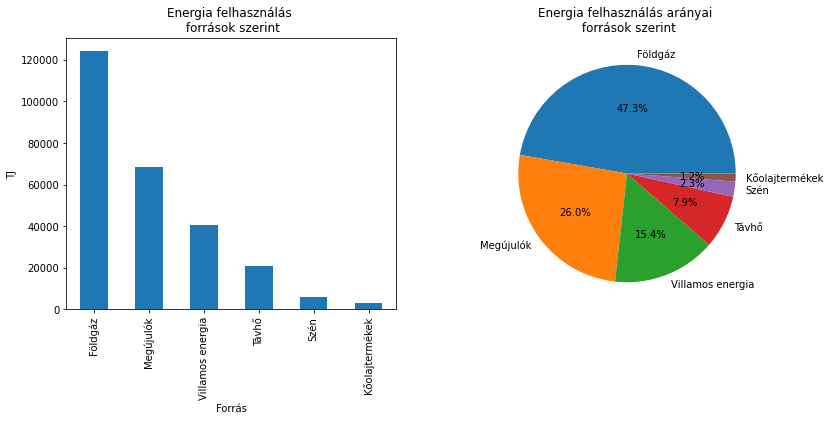

In [6]:
összesen_forras = energiaMérleg.sum(axis=1).sort_values(ascending=False)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
összesen_forras.plot(  
    kind = 'bar', 
    stacked = False, 
    title = 'Energia felhasználás \n források szerint', 
    mark_right = True,
    ylabel='TJ',
    ax = axs[0])

összesen_forras.plot(  
    kind = 'pie', 
    title = 'Energia felhasználás arányai \n források szerint', 
    ylabel='',
    autopct='%1.1f%%',
    ax = axs[1])

plt.show()

In [7]:
# melyik energiahordozó mire van használva
szerkezet_forras = energiaMérleg.div(energiaMérleg.sum(axis=1), axis=0)
print('\nSzerkezet: források bontása felhasználási módonként (sorösszegek aránya)')
#display(szerkezet_forras.style.highlight_max(axis=1).format('{:.2%}')) ... ez sajna nem megy át LateXba
szerkezet_forras.round(4) *100


Szerkezet: források bontása felhasználási módonként (sorösszegek aránya)


Felhasználás,Főzés,Fűtés,Hűtés,Készülékek,Melegvíz
Forrás,,,,,
Földgáz,6.52,83.52,0.00,0.00,9.96
Kőolajtermékek,73.07,12.75,0.00,0.00,14.18
Megújulók,0.00,97.97,0.00,0.00,2.03
Szén,0.00,100.00,0.00,0.00,0.00
Távhő,0.00,76.59,0.00,0.00,23.41
Villamos energia,3.65,3.74,0.77,61.26,30.57


In [8]:
# használati módok milyen energiahordozóból vannak ellátva
print('\nSzerkezet: felhasználási módok bontása energiaforrásonként (oszlopösszegek aránya)')
szerkezet_mod = energiaMérleg.div(energiaMérleg.sum(axis=0), axis=1)
szerkezet_forras.round(4) *100


Szerkezet: felhasználási módok bontása energiaforrásonként (oszlopösszegek aránya)


Felhasználás,Főzés,Fűtés,Hűtés,Készülékek,Melegvíz
Forrás,,,,,
Földgáz,6.52,83.52,0.00,0.00,9.96
Kőolajtermékek,73.07,12.75,0.00,0.00,14.18
Megújulók,0.00,97.97,0.00,0.00,2.03
Szén,0.00,100.00,0.00,0.00,0.00
Távhő,0.00,76.59,0.00,0.00,23.41
Villamos energia,3.65,3.74,0.77,61.26,30.57


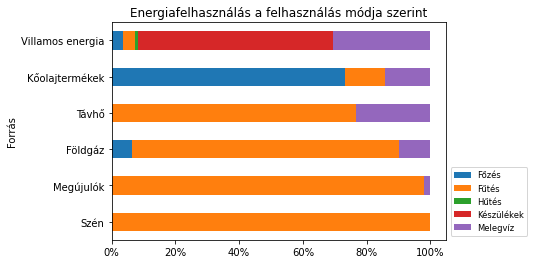

In [9]:
import matplotlib.ticker as mticker
c = szerkezet_forras.sort_values(['Fűtés'],ascending=False).plot(  
    kind = 'barh', 
    stacked = True, 
    title = 'Energiafelhasználás a felhasználás módja szerint',     
    mark_right = True
)
ticks_loc = c.get_xticks().tolist()

c.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
x = c.set_xticklabels(['{:,.0%}'.format(x) for x in c.get_xticks()])
l = plt.legend(bbox_to_anchor=(1, 0),loc='lower left', fontsize='small')

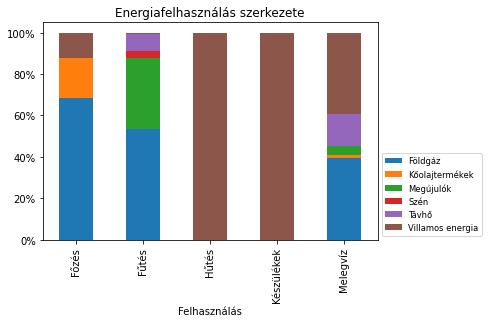

In [10]:
d = szerkezet_mod.T.plot(  
    kind = 'bar', 
    stacked = True, 
    title = 'Energiafelhasználás szerkezete',     
    mark_right = True) 

# y_value=['{:,.0%}'.format(x) for x in ax1.get_yticks()]
# ax1.set_yticklabels(y_value)
ticks_loc = c.get_xticks().tolist()

d.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
x = d.set_yticklabels(['{:,.0%}'.format(x) for x in d.get_yticks()])
l = plt.legend( bbox_to_anchor=(1, 0),loc='lower left', fontsize='small')

### Szöveges értékelés

A 2017-es lakossági energiamérleg adataiből kitűnik, hogy az energiafelhasználás legnagyobb része, 74%-át a fűtés igényli, a melegvíz és elektromos készülékek 10% körül, a Főzés 5%-t és a legkisebb részt a Hűtés teszi ki.

A 263.301 TJ-nyi energiafelhasználás 47.3%-a legnagyobb része földgáz alapú. A megújulók 26%-t a villamos energia pedig  pedig 15%-t tesz ki. Jelentős még a távhó ami 8%-a teljes energiafelhasználásnak.

Az energiafelhasználás legnagyobb része tehát a földgáz, amelyet túlnyomó részben 

Az energiafelhasználás szerkezetét tekintve látható, hogy vannak olyan felhasználó területek amelyeknél helyettesítő termékek is szerepet kapnak: a Háztartási főzés például Földgáz, Kőolajtermékek és kisebb részben villamos energiával is ellátható. De elektromos készülékek esetében teljes mértékben a villamos energia felhasználás a mérvadó.   

Az "Energiafelhasználás a felhasználás módja szerint" ábrából  látható, hogy Fűtésre "mindent használunk". Valamennyi energiahordozó felhasználásra kerül fűtés céljából. A két szélső érték itt a villamos energia aminek a legszélesebb a felhasználási lehetősége a szén pedig csak Fűtésre, ugymond 1 alkalmazási területe van csak.

## Hasonlítsa össze az egyes energiafajták relatív árát!

In [11]:
n = 9609.4 # Ezer fő lakott 2017-ben a magánháztartásokban

# egy főre jutó kiadások nagysága (Ft/fő/év)
dfKiadasok = pd.read_excel('hf_energia.xlsx',
                                sheet_name='Leiro', 
                                usecols='F:G', index_col=0)
dfKiadasok.dropna(axis=0)

,egy főre jutó kiadások nagysága (Ft/fő/év)
Forrás.1,
Villamos energia,44596.0
Távhő,12314.0
Földgáz,48969.0
Szén,1560.0
Kőolajtermékek,3762.0
Megújulók,23094.0


In [12]:
# Relatív ár: ehhez szükség van egy táblára ami a kiadások nagysága, és az egyes energiafajták felhasználását mutatja
# ha a kiadás nagyságát elosztjuk a felhasználással, akkor 
df1 = energiaMérleg.sum(axis=1)
df2 = dfKiadasok.dropna(axis=0)
df2.index.rename('Forrás', inplace=True)

df3 = pd.concat([df1, df2], axis=1)
df3['Relativ Ár']=df3[df3.columns[1]]/df3[df3.columns[0]]
df3['Relativ Kiadás']=df3[df3.columns[1]]/df3[df3.columns[0]]*n
df3

,0,egy főre jutó kiadások nagysága (Ft/fő/év),Relativ Ár,Relativ Kiadás
Földgáz,124420.0,48969.0,0.393578,3782.050383
Kőolajtermékek,3138.0,3762.0,1.198853,11520.255832
Megújulók,68440.0,23094.0,0.337434,3242.540672
Szén,5930.0,1560.0,0.263069,2527.936594
Távhő,20878.0,12314.0,0.589807,5667.695737
Villamos energia,40495.0,44596.0,1.101272,10582.560869


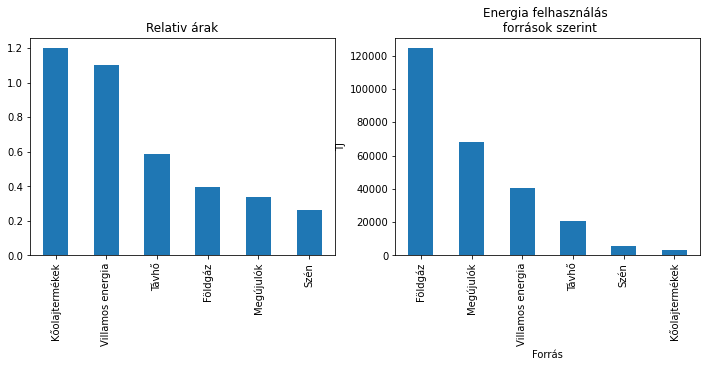

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

chart=df3['Relativ Ár'].sort_values(ascending=False).plot(
    kind='bar',
    title = 'Relativ árak', 
    ax = axs[0])

összesen_forras.plot(  
    kind = 'bar', 
    sort_columns = True,
    title = 'Energia felhasználás \n források szerint', 
    ylabel='TJ',
    ax = axs[1])

plt.show()

Szöveges értékelés:
- A kőolajtermékek relativ árai a legmagasabbak, felhasználásuk a legalacsonyabb, ami a termék keresletének rugalmasságára utal.
- a villamos energia relativ ára és mennyisége arra utal hogy a felhasználási módok közül a világítás és elektromos berendezések terén rugalmatlan a kereslet, nincs  helyettesítő termék.

# Feladat
(2. feladat)

Mielőtt a feladatnak nekiállnék először magát a táblázatot nézem meg, hogy milyen adatok vannak benne, azok milyen típusúak, alapvető statisztikákat (számosság, min, max, átlag), a minőségi ismérvek típusai vizsgálom.

## Adatok előkészítése

In [14]:
# adattábla beolvasása
dfKapcsolat = pd.read_excel('hf_energia.xlsx',sheet_name='kapcsolat', usecols='A:H')

# a minőségi ismérveket átalakítom 'category' típusra
# így tudok rájuk a kódjuk alapján is hivatkozni
dfKapcsolat['Társaság'] = dfKapcsolat['Társaság'].astype('category')
dfKapcsolat['Település'] = dfKapcsolat['Település'].astype('category')
dfKapcsolat['Elhelyezkedés'] = dfKapcsolat['Elhelyezkedés'].astype('category')
dfKapcsolat['Szolgáltatások Száma'] = dfKapcsolat['Szolgáltatások Száma'].astype('category')

dfKapcsolat.head()

,Társaság,Távolság,Település,Elhelyezkedés,Nyitva tartás,Szolgáltatások Száma,95-ös benzin,Gázolaj
0,Petrol,30.5,Ajka,belterület,16,1 és 3 között,346.80,387.2
1,Shell,29.9,Ajka,belterület,24,1 és 3 között,350.88,394.9
2,MOL,29.5,Ajka,belterület,18,4 és több,350.88,397.1
3,MOL,32.2,Ajka,főút mellett,24,1 és 3 között,353.94,397.1
4,OIL,43.7,Zirc,belterület,24,0,357.00,397.1


In [15]:
dfKapcsolat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Társaság              78 non-null     category
 1   Távolság              78 non-null     float64 
 2   Település             78 non-null     category
 3   Elhelyezkedés         78 non-null     category
 4   Nyitva tartás         78 non-null     int64   
 5   Szolgáltatások Száma  78 non-null     category
 6   95-ös benzin          78 non-null     float64 
 7   Gázolaj               78 non-null     float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 5.0 KB


A táblázatban 8 ismérvvel van megadva a statisztikai egységek ami egy benzinkut.

- Társaság:      minőségi *
- Távolság:      mennyiségi
- Település:     területi *
- Elhelyezkedés: minőségi *
- Nyitva tartás  mennyiségi
- Szolgáltatások Száma : mennyiségi
- 95-ös benzin[ára]: mennyiségi
- Gázolaj [ára]: mennyiségi

Az adatokat átalakítottam ugy hogy a python /pandas lehetőségeit ki tudjam használni. A Minőségi ismérvek category típusuak, a mennyiségi ismérvek valamilyen numerikus típusuak. Ez fontos lesz a vizualizálás szempontjából.

## Nevezzen meg asszociációs, vegyes és korrelációs kapcsolatokat!

### Associácios kapcsolatok

Associacios kapcsolatok lehetnek:
- társaság település kapcsolata: a kapcsolat erőssége utalhat a társaság politikájára illetve a település forgalmára
- társaságok jellemző benzinkut elhelyezései: utalhat a társaság  terjeszkedési stratégiájára, illetve elhelyezkedések vonzóerejáre.
- társaságok által biztosított szolgáltatások: mely társaság diverzifikál és több szolgáltatást biztosít.
- települések és elhelyezkedések: 
- települések és Szolgáltatások száma
- Elhelyezkedés és Szolgáltatások száma

In [16]:
print('Minőségi ismérvek:', dfKapcsolat.select_dtypes(include='category').columns.to_list())

Minőségi ismérvek: ['Társaság', 'Település', 'Elhelyezkedés', 'Szolgáltatások Száma']


#### asszociációs: Társaság és elhelyezkedés kapcsolata

In [17]:
print(dfKapcsolat.groupby(['Társaság','Elhelyezkedés'])['Társaság'].count().unstack())
chi2, p, dof, ex = chi2_contingency(pd.DataFrame(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=False)))

# Ismérvek száma
N = 78
# Ismérvváltozatok száma
C = math.sqrt(chi2/(2*N))
print(f'Cramer-mutató: {C:.4f}')
display(Latex(f'$\\chi^2$:{chi2:.2f}'))
display(f'Cramer asszociációs együttható: {C:.2f}')

Elhelyezkedés  belterület  főút mellett  sztráda mellett
Társaság                                                
Avia                    4             0                0
Lukoil                  4             3                0
MOL                    21            13                6
OIL                     1             1                0
OMV                     7             1                0
Petrol                  2             2                0
Shell                  10             1                2
Cramer-mutató: 0.2831


<IPython.core.display.Latex object>

'Cramer asszociációs együttható: 0.28'

#### asszociációs: Társaság és Szolgáltatások Száma kapcsolata

In [18]:
# Társaság elhelyezkedés viszonylatában a gázolaj ára már érdekesebb
print(dfKapcsolat.groupby(['Társaság','Szolgáltatások Száma'])['Szolgáltatások Száma'].count().unstack().round(2))
chi2, p, dof, ex = chi2_contingency(pd.DataFrame(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat['Szolgáltatások Száma'], margins=False)))
C = math.sqrt(chi2/(2*78))

display(Latex(f'$\\chi^2$:{chi2:.3f}'))
print(f'Cramer-mutató: {C:.4f}')

Szolgáltatások Száma  0  1 és 3 között  4 és több
Társaság                                         
Avia                  0              2          2
Lukoil                6              1          0
MOL                   0             17         23
OIL                   1              0          1
OMV                   2              6          0
Petrol                1              3          0
Shell                 1             12          0


<IPython.core.display.Latex object>

Cramer-mutató: 0.6298


In [19]:
def describe(df, stats):
    d = df.describe()
    return d.append(df.agg(stats))

### Vegyes kapcsolatok

#### Vegyes: Társaság és gázolaj ár kapcsolata

          count    mean    std    min     25%     50%     75%    max
Társaság                                                            
Avia        4.0  405.08   2.75  403.7  403.70  403.70  405.08  409.2
Lukoil      7.0  405.11   7.06  399.3  400.40  401.50  407.55  419.1
MOL        40.0  413.66  16.71  397.1  403.70  408.65  412.50  458.7
OIL         2.0  406.45  13.22  397.1  401.78  406.45  411.12  415.8
OMV         8.0  405.90   6.11  399.3  402.60  403.70  408.10  419.1
Petrol      4.0  396.28   6.31  387.2  394.63  398.20  399.85  401.5
Shell      13.0  410.64  16.73  394.9  400.40  405.90  410.30  445.5


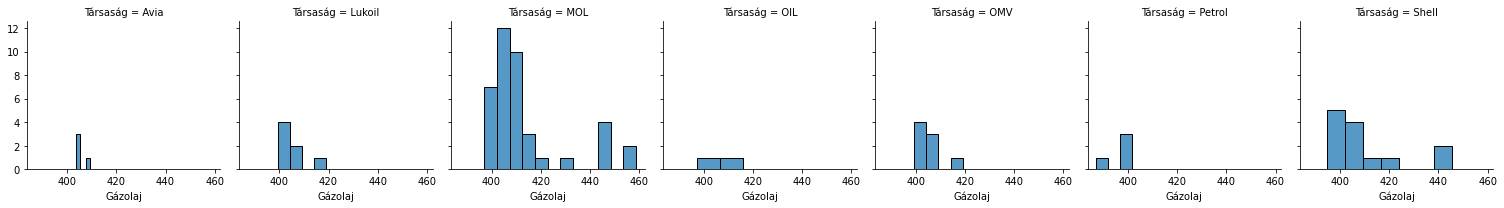

In [20]:
print(dfKapcsolat.groupby(['Társaság'])['Gázolaj'].describe().round(2))
fg = sns.FacetGrid(dfKapcsolat, col='Társaság')
x = fg.map(sns.histplot, 'Gázolaj')

#### Vegyes: Elhelyezkedés és gázolaj ár kapcsolata

                 count    mean   std    min    25%    50%    75%    max
Elhelyezkedés                                                          
belterület        49.0  405.16  7.23  387.2  400.4  403.7  408.1  430.1
főút mellett      21.0  406.79  5.77  397.1  401.5  407.0  410.3  419.1
sztráda mellett    8.0  448.80  6.11  445.5  445.5  445.5  448.8  458.7


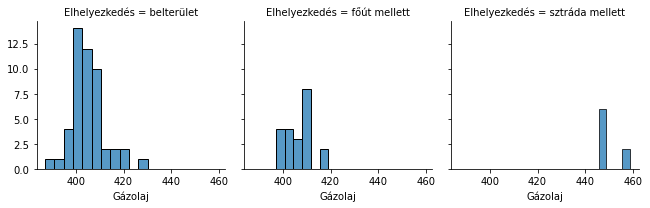

In [21]:
print(dfKapcsolat.groupby(['Elhelyezkedés'])['Gázolaj'].describe().round(2))
fg = sns.FacetGrid(dfKapcsolat, col='Elhelyezkedés')
x = fg.map(sns.histplot, 'Gázolaj')

A belterületi gázolajárak eloszlása akár használható  is lehet további elemzésre

#### Vegyes: Szolgáltatások Száma és gázolaj ár kapcsolata

                      count    mean    std    min    25%    50%     75%    max
Szolgáltatások Száma                                                          
0                      11.0  406.00  13.66  397.1  399.3  400.4  407.55  445.5
1 és 3 között          41.0  410.89  16.49  387.2  402.6  405.9  411.40  458.7
4 és több              26.0  410.51  12.47  397.1  403.7  407.0  412.23  445.5


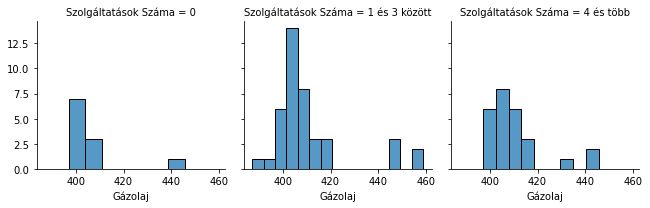

In [22]:
print(dfKapcsolat.groupby(['Szolgáltatások Száma'])['Gázolaj'].describe().round(2))
fg = sns.FacetGrid(dfKapcsolat, col='Szolgáltatások Száma')
x = fg.map(sns.histplot, 'Gázolaj')

In [23]:
# TÁRSASÁG - ELHELYEZKEDÉS
# Kombinációs tábla előállítása
# Az összesítő sor (margins=True) a feltétel nélküli megoszlásokat mutatja
# a tábázat cellái pedig a kutak megoszlásának feltételes megoszlását mutatja
# összesen N=78 kutat vizsgálunk(elemszám)

print(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=True))

Elhelyezkedés  belterület  főút mellett  sztráda mellett  All
Társaság                                                     
Avia                    4             0                0    4
Lukoil                  4             3                0    7
MOL                    21            13                6   40
OIL                     1             1                0    2
OMV                     7             1                0    8
Petrol                  2             2                0    4
Shell                  10             1                2   13
All                    49            21                8   78


#### Kontingencia táblák

In [24]:
# A benzinkutak %os megoszlása  társaság és elhelyezkedés szerinti csoportosításban
# display(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, normalize='columns').style.format("{:.2%}"))
pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, normalize='columns').round(4)

Elhelyezkedés,belterület,főút mellett,sztráda mellett
Társaság,,,
Avia,0.0816,0.0000,0.00
Lukoil,0.0816,0.1429,0.00
MOL,0.4286,0.6190,0.75
OIL,0.0204,0.0476,0.00
OMV,0.1429,0.0476,0.00
Petrol,0.0408,0.0952,0.00
Shell,0.2041,0.0476,0.25


In [25]:
# A benzinkutak Elhelyezkedés szerinti %-os megoszlása a benzinkút társaság szerinti csoportosításban
# display(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, normalize='index').style.format('{:.2%}'))
pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, normalize='index').round(4)

Elhelyezkedés,belterület,főút mellett,sztráda mellett
Társaság,,,
Avia,1.0000,0.0000,0.0000
Lukoil,0.5714,0.4286,0.0000
MOL,0.5250,0.3250,0.1500
OIL,0.5000,0.5000,0.0000
OMV,0.8750,0.1250,0.0000
Petrol,0.5000,0.5000,0.0000
Shell,0.7692,0.0769,0.1538


#### Cramer asszociációs együttható számítása
A Cramer-együttható értéke akkor és csak akkor 0, ha a két ismérv független egymástól, és teljes függés esetén veszi fel az 1 értéket.
(ref: https://mersz.hu/hivatkozas/dj270smea_s2.3.3_p35#dj270smea_s2.3.3_p35)

Lépések:
1. tényleges és feltételezett gyakoriságok
2. feltételezett gyakoriságok fij* számítása
3. a X2 kiszámítása
4. Cramer együttható kiszámolása
5. szöveges értelmezés

In [26]:
pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=True)


Elhelyezkedés,belterület,főút mellett,sztráda mellett,All
Társaság,,,,
Avia,4,0,0,4
Lukoil,4,3,0,7
MOL,21,13,6,40
OIL,1,1,0,2
OMV,7,1,0,8
Petrol,2,2,0,4
Shell,10,1,2,13
All,49,21,8,78


#### Feltételezett gyakoriságok táblázata

In [27]:
pd.DataFrame(chi2_contingency(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=False))[3])

,0,1,2
0,2.512821,1.076923,0.410256
1,4.397436,1.884615,0.717949
2,25.128205,10.769231,4.102564
3,1.256410,0.538462,0.205128
4,5.025641,2.153846,0.820513
5,2.512821,1.076923,0.410256
6,8.166667,3.500000,1.333333


#### Khí négyzet próba

In [28]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(dfKapcsolat.Társaság, dfKapcsolat.Elhelyezkedés, margins=False))
Latex(f'$\\chi^2$:{chi2:.3f}')

<IPython.core.display.Latex object>

In [29]:
C = math.sqrt(chi2/(2*78))
print(f'Cramer-mutató: {C:.4f}')

Cramer-mutató: 0.2831


A Cramer mutató függvényszerű kapcsolatnál 1, függetlenség esetén pedig 0. Most tehát akét ismérv kapcsolata nem függvényszerű és nem is független. Az érték 0.2831 a kapcsolat gyenge.

### Korrelációs kapcsolatok
távolság - gázolaj ára - nyitva tartás - gázolaj ár

In [30]:
# Korreláció : 2 mennyiségi ismérv közti kapcsolat, 
# int és float típusú oszlopok közül lehet választani
dfKapcsolat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Társaság              78 non-null     category
 1   Távolság              78 non-null     float64 
 2   Település             78 non-null     category
 3   Elhelyezkedés         78 non-null     category
 4   Nyitva tartás         78 non-null     int64   
 5   Szolgáltatások Száma  78 non-null     category
 6   95-ös benzin          78 non-null     float64 
 7   Gázolaj               78 non-null     float64 
dtypes: category(4), float64(3), int64(1)
memory usage: 5.0 KB


In [31]:
dfKapcsolat[['Távolság', 'Gázolaj', 'Nyitva tartás', '95-ös benzin']].describe().round(2)

,Távolság,Gázolaj,Nyitva tartás,95-ös benzin
count,78.00,78.00,78.00,78.00
mean,29.96,410.07,19.53,369.78
std,10.66,14.79,4.36,15.04
min,9.70,387.20,12.00,346.80
25%,23.75,401.50,16.00,362.10
50%,28.80,405.90,18.00,365.67
75%,38.35,411.12,24.00,370.26
max,48.80,458.70,24.00,414.12


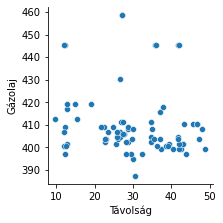

In [32]:
# Elsőre azt nézem meg ami intuitive nyilvánvalónak kellene hogy tűnjön. 
# önző módon valami olyasmit keresek ami a gázolaj árára engedne következtetni... 
# távolság? társaság? elhelyezkedés?
rp = sns.relplot(x=dfKapcsolat.Távolság, y=dfKapcsolat.Gázolaj, height =3)

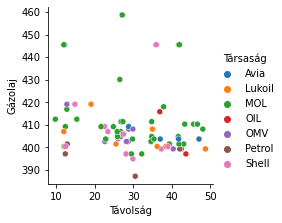

In [33]:
# itt csak kiszineztem a pöttyöket benzinkut társaságonként, hátha valamit észreveszek... de nem
sns.relplot(x=dfKapcsolat.Távolság, y=dfKapcsolat.Gázolaj,  hue=dfKapcsolat.Társaság, height =3)

Azt kersem, hogy látok e olyan eloszlást valamelyik korrelációs pár esetén amelyik normál eloszlás jellegű, még akár ugy is ha majd mondjuk nem az egész pár hanem csak egy részsokasága mondjuk társaság szerint lenne normális, mert akkor a lineáris regresszió elég is lenne.

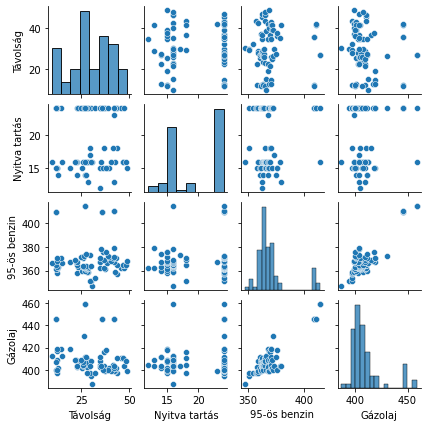

In [34]:
p=sns.pairplot(dfKapcsolat, height=1.5)

A Gázolaj és Benzin ár között érdemes így ránézésre pozitiv korrelációt keresnek. A többi esetben tovább kell bontani a sokaságot

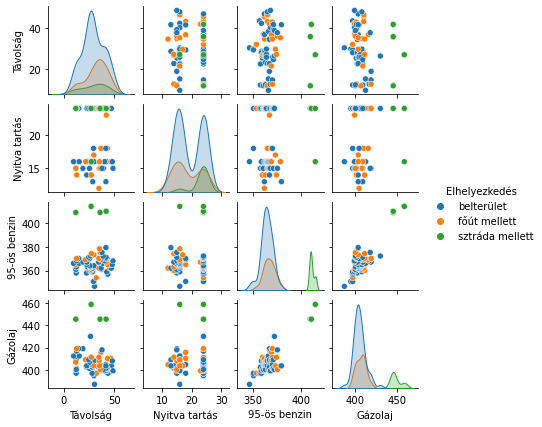

In [35]:
# Hozzáadom az elhelyezkedést, hátha abból kitűnik valamiféle tömörülés
p=sns.pairplot(dfKapcsolat, hue="Elhelyezkedés", height=1.5)

Ebből így elsőre a következőket tudom leszűrni:
- ugy tűnik a kiugró ( outlier) értékek inkább a strada mellettiségből fakadnak
    

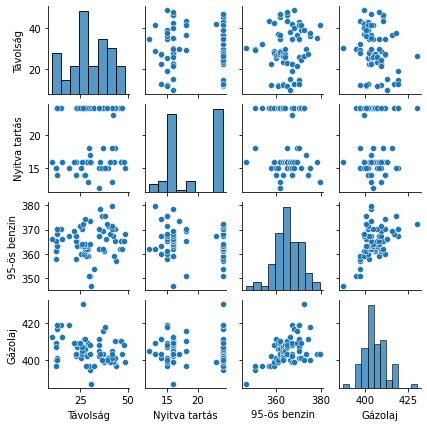

In [36]:
# Nézzük meg a mennyiségi ismérveket "sztráda nélkül"
p=sns.pairplot(dfKapcsolat[dfKapcsolat['Elhelyezkedés']!= 'sztráda mellett'], height=1.5)

A két üzemanyag eloszlása már hasonlít a normál eloszlásra.

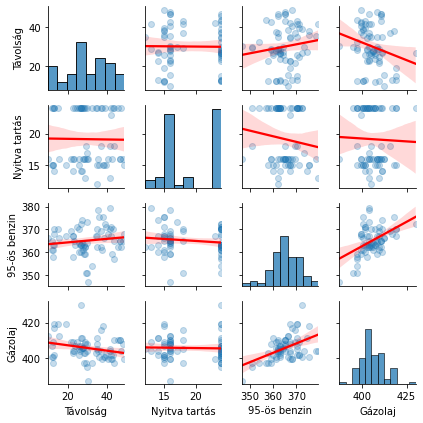

In [37]:
g = sns.PairGrid(dfKapcsolat[dfKapcsolat['Elhelyezkedés']!= 'sztráda mellett'],height=1.5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot,lowess=False, scatter_kws={'alpha':0.25}, line_kws={'color': 'red'})

In [38]:
# Liniáris kapcsolat szorossága - Kovariancia
# Az X és Y közötti kapcsolat tényét és irányát jelzi
dfKapcsolat.cov().round(2)

,Távolság,Nyitva tartás,95-ös benzin,Gázolaj
Távolság,113.61,-0.57,4.44,-19.17
Nyitva tartás,-0.57,18.98,13.04,13.78
95-ös benzin,4.44,13.04,226.26,201.85
Gázolaj,-19.17,13.78,201.85,218.75


In [39]:
dfKapcsolat.corr(method='pearson').round(4)

,Távolság,Nyitva tartás,95-ös benzin,Gázolaj
Távolság,1.0000,-0.0123,0.0277,-0.1216
Nyitva tartás,-0.0123,1.0000,0.1990,0.2138
95-ös benzin,0.0277,0.1990,1.0000,0.9073
Gázolaj,-0.1216,0.2138,0.9073,1.0000


<AxesSubplot:>

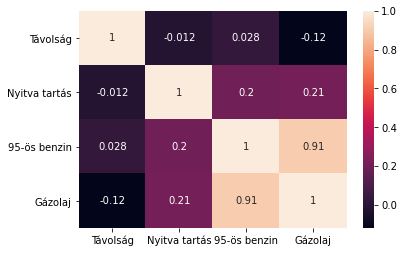

In [40]:
sns.heatmap(dfKapcsolat.corr(method='pearson'), annot=True)

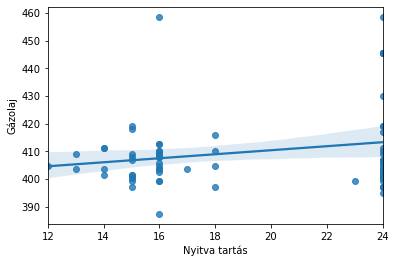

In [41]:
x = sns.regplot(x=dfKapcsolat['Nyitva tartás'], y=dfKapcsolat['Gázolaj'], order=1)

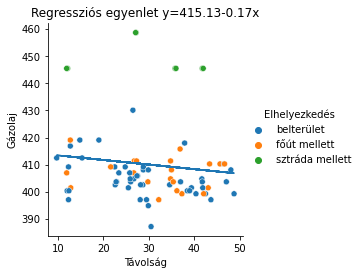

In [42]:
x = dfKapcsolat.Távolság
y = dfKapcsolat.Gázolaj

m, b = np.polyfit(x, y, 1)
sns.relplot(x=x,y=y, hue=dfKapcsolat.Elhelyezkedés, height=3.5)
plt.plot(x, m*x + b)
title = 'Regressziós egyenlet y={:.2f}{:+.2f}x'.format(b, m)
x = plt.title(title)

A Gázolaj ára Akalitól távolodva olcsóbb. Negatív korreláció van a két ismérv között.

In [43]:
# Ellenőrzés
res = smf.ols(formula='Gázolaj ~ Távolság', data=dfKapcsolat).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Gázolaj   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.141
Date:                Mon, 23 Nov 2020   Prob (F-statistic):              0.289
Time:                        22:36:41   Log-Likelihood:                -319.72
No. Observations:                  78   AIC:                             643.4
Df Residuals:                      76   BIC:                             648.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    415.1305      5.020     82.692      0.0

# Feladat
(3. feladat indexszámítás)

## Elemezze a folyamatokat a kétféle indexkör összefüggésével

Standardizálás: az átlagár változására ható tényezők kimutatása, ezáltal 
- az árak átlagos változását és 
- az összetétel változását

számszerűsítjük.

$I = I' \cdot I"$

Indexszámítás: az értékváltozást bontjuk fel az 
- árak átlagos változásának és a 
- mennyiség átlagos változásának 

hatására.

$I_v = I_p \cdot I_q$

In [44]:
# adatforrás beolvasása, átalakítása, 
data = pd.read_excel('hf_energia.xlsx', sheet_name='Index', usecols='A:D').dropna()
# data['Tarifa'] = data['Tarifa'] .astype('category')
data['Év'] = data['Év'].astype('int64')
data['Ár'] = data['Ár'].astype('int64')
data['Fogyasztás'] = data['Fogyasztás'].astype('int64')
d = data.groupby(['Tarifa', 'Év']).sum().unstack()
print(d)

               Ár      Fogyasztás     
Év           1989 1991       1989 1991
Tarifa                                
Kisvállalat     8   12          5    5
Lakosság        5   15         10    8
Nagyvállalat   10   11         20   21


In [45]:
df = pd.DataFrame(data=d.values, columns=['p0','p1','q0','q1'], index = d.index)

# dataframe felbővítése
df['q0p0'] = df.q0*df.p0  # bázis forgalom
df['q1p1'] = df.q1*df.p1  # tárgy forgalom
df['q1p0'] = df.q1*df.p0  # forgalom bázis áron 
df['q0p1'] = df.q0*df.p1  # forgalom bázis mennyiségen

#Forgalom %-os megoszlása
df['q0p0%'] = df.q0p0 / df.q0p0.sum()
df['q1p1%'] = df.q1p1 / df.q1p1.sum()

# egyedi ár, volumen és értékindex
df['ip'] = df.p1/df.p0
df['iq'] = df.q1/df.q0
df['iv'] = (df.q1*df.p1)/(df.q0*df.p0)

df

,p0,p1,q0,q1,q0p0,q1p1,q1p0,q0p1,q0p0%,q1p1%,ip,iq,iv
Tarifa,,,,,,,,,,,,,
Kisvállalat,8,12,5,5,40,60,40,60,0.137931,0.145985,1.5,1.00,1.500
Lakosság,5,15,10,8,50,120,40,150,0.172414,0.291971,3.0,0.80,2.400
Nagyvállalat,10,11,20,21,200,231,210,220,0.689655,0.562044,1.1,1.05,1.155


In [46]:
## Aggregált indexek  ##

# Értékindex
Iv = df.q1p1.sum()/df.q0p0.sum()

# VolumenIndexek
Iq_L = df.q1p0.sum()/df.q0p0.sum()
Iq_P = df.q1p1.sum()/df.q0p1.sum()
Iq_F = math.sqrt(Iq_P * Iq_L)  

# Árindexek
Ip_L = df.q0p1.sum()/df.q0p0.sum() # Laypeyres bazis suly
Ip_P = df.q1p1.sum()/df.q1p0.sum() # Paasche tárgy suly
Ip_F = math.sqrt(Ip_P * Ip_L)      # Fisher

## Standardizáláson alapuló indexkör ##

# Összhatás, Főátlag index
I = (df.q1p1.sum()/df.q1.sum())/(df.q0p0.sum()/df.q0.sum())

# Részhatás index (I') aggregát forma
I_rh_0  = df.q0p1.sum()/df.q0p0.sum()  # Bs=B0
I_rh_1  = df.q1p1.sum()/df.q1p0.sum()  # Bs=B1

# Összetételhatás-index (I")
# a sokaság belső összetételében bekövetkező változás hatását számszerűsíti.
I_öh_0 = (df.q1p0.sum()/df.q1.sum())/(df.q0p0.sum()/df.q0.sum())
I_öh_1 = (df.q1p1.sum()/df.q1.sum())/(df.q0p1.sum()/df.q0.sum())

# Mennyiség változás
I_sq = df.q1.sum()/df.q0.sum()

# volumenindex, mind amennyiség és összetételváltozás szorzata
# I_q0 = I_sq * Iő

In [47]:
# Értékek megjelenítése
print(f'''
INDEXSZÁMÍTÁS INDEXEI
==============================
Iv:     {Iv  :10.3%}
Iq (0): {Iq_L:10.3%} 
Iq (1): {Iq_P:10.3%}
Iq (F): {Iq_F:10.3%}
Ip (0): {Ip_L:10.3%} 
Ip (1): {Ip_P:10.3%}
Ip (F): {Ip_F:10.3%}

STANDARDIZÁLÁS INDEXEI
==============================
I:       {I  :10.3%} ({I-1:>+7.2%})
I'0:     {I_rh_0:10.3%} 
I'1:     {I_rh_1:10.3%} 
I"0 :    {I_öh_0:10.3%}
I"1 :    {I_öh_1:10.3%} ({I_öh_1-1:>+7.2%})
I_sq:    {I_sq:10.3%} ({I_sq-1:>+7.2%})

TELJES FELBONTÁS
==============================
''')

frame = pd.DataFrame(columns=['q_basis', 'q_targy'],  
                     index=['p_basis', 'p_targy'], 
                     data=[[df.q0p0.sum(),df.q0p1.sum()],[df.q1p0.sum(),df.q1p1.sum()]])
frame['delta'] = frame.q_targy/frame.q_basis
# print(frame)
print('Ellenőrzés: Iv = Iq0*Ip1 = Isq * I"0 * I\'1')
print('{} :  {:.6f} = {:.6f} * {:.6f}'.format((Iv==(Iq_L*Ip_P)),Iv,Iq_L,Ip_P))
print('{}:  {:.6f} = {:.6f} * {:.6f} * {:.6f}'.format((Iv==I_sq*I_öh_0* I_rh_1),Iv,I_sq, I_öh_0, I_rh_1))
diff = Iq_L*Ip_P - I_sq*I_öh_0* I_rh_1

if (diff < 0.00001):
    valuation = 'ELHANYAGOLHATÓ'
else:
    valuation = 'ENNEK STIMMELNIE KELLENE...'
print('Eltérés: {:.3} {}'.format(diff, valuation))
print('\n')

print('Ellenőrzés: Iv = Iq1*Ip0 = Isq * I"1 * I\'0')
print('{} :  {:.6f} = {:.6f} * {:.6f}'.format((Iv==(Iq_P*Ip_L)),Iv,Iq_P,Ip_L))
print('{}:  {:.6f} = {:.6f} * {:.6f} * {:.6f}'.format((Iv==I_sq*I_öh_1* I_rh_0),Iv,I_sq, I_öh_1, I_rh_0))
diff = Iq_L*Ip_P - I_sq*I_öh_0* I_rh_1

if (diff < 0.00001):
    valuation = 'ELHANYAGOLHATÓ'
else:
    valuation = 'ENNEK STIMMELNIE KELLENE...'
print('Eltérés: {:.3} {}'.format(diff, valuation))


INDEXSZÁMÍTÁS INDEXEI
Iv:       141.724%
Iq (0):   100.000% 
Iq (1):    95.581%
Iq (F):    97.766%
Ip (0):   148.276% 
Ip (1):   141.724%
Ip (F):   144.963%

STANDARDIZÁLÁS INDEXEI
I:         145.892% (+45.89%)
I'0:       148.276% 
I'1:       141.724% 
I"0 :      102.941%
I"1 :       98.393% ( -1.61%)
I_sq:       97.143% ( -2.86%)

TELJES FELBONTÁS

Ellenőrzés: Iv = Iq0*Ip1 = Isq * I"0 * I'1
True :  1.417241 = 1.000000 * 1.417241
False:  1.417241 = 0.971429 * 1.029412 * 1.417241
Eltérés: 2.22e-16 ELHANYAGOLHATÓ


Ellenőrzés: Iv = Iq1*Ip0 = Isq * I"1 * I'0
True :  1.417241 = 0.955814 * 1.482759
False:  1.417241 = 0.971429 * 0.983926 * 1.482759
Eltérés: 2.22e-16 ELHANYAGOLHATÓ


## Jellemezze a két év alatti gazdaságpolitikai célkitűzéseket szövegesen is.
### Szöveges értelmezés
A bázisról a tárgyidőszakra a villamos energiára kifizetett összeg ($I_v$:) +41,72%-kal nőtt.
Az a változás 3 tényezőre bontható fel:
- az árak átalagosan +48,72%kal nőttek
- a fogyasztás eltolódott -1,6%-kal az olcsóbb tarifák felé
- a fogyasztott mennyiség pedig -2,8%-kal csökkent
    
$I_v = I_q^1 \cdot I_p^0 = I_{\sum q} \cdot I_1^"  \cdot I'_0$

1.417241 = 0.971429 * 0.983926 * 1.482759


Az áremelkedés különösen drámai volt a lakossági, egyben legrugalmatlanabb  szegmensben: az árak 3szorosra nőttek, a fogyasztás 20%-t esett vissza, a villamos energiáért kifizetett összeg 2,4szeresére nőtt. 

A vállalati szektorban a növekvő árak nem okoztak mennyiségcsökkenést.

A gazdaságpolitika nem védte a lakossági fogyasztókat a piaci hatásoktól.

- itt a vége - 